In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df.shape


(9826, 9)

In [4]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
        9826 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.0+ KB


In [6]:
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9821    False
9822    False
9823    False
9824    False
9825    False
Length: 9826, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary 
. we have a dataframe consisting of 9827 rows and 9 columns
 
 dataset do not contain any duplicate values

Release_Date column needs to be casted into date time and to extract only the year value.

Overview, Original_language and poster url wouldn't be so useful during analysis, so dropping them.

there is noticable outliers in popularity column vote_average better be categorised  for proper analysis.


gener column has comma seperated values and white spaces that needs to be handled and casted into category. Exploration summary 


# 1. Release_Date column needs to be casted into date time and to extract only year value. 

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtype)


datetime64[ns]


C:\Users\kanai\AppData\Local\Temp\ipykernel_5712\2390484883.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


In [12]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [13]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# 2. Overview, Original_language and poster url wouldn't be so useful during analysis, so dropping them

In [14]:
cols = ['Overview', 'Original_Language' , 'Poster_Url\r']


In [15]:
df.drop(cols,axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# 3.column vote_average better be categorised  for proper analysis.

In [17]:

def categorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe() ['max']]
    df[col] = pd.cut(df[col],edges , labels = labels)
    return df

In [18]:
labels= ['not_popular' , 'below_avg' , 'average', 'popular']


In [19]:
categorize_col(df, 'Vote_Average' , labels)
df ['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# categorising according to vote_avg

In [21]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

identifying nans and duplicate

In [22]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [23]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# 4.gener column has comma seperated values and white spaces that needs to be handled and casted into category

We'd split genres into list and then explode our dataframe to have only one genre per row for each movie

In [24]:
df_reversed = df.groupby('Title')['Genre'].apply(list).reset_index()
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [25]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [26]:
df.shape

(25551, 6)

In [27]:
#casting column genre into category
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [28]:
#unique values
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data visualization 

In [29]:
sns.set_style('whitegrid')

# what is the most frequent genre of movies released on Netflix ?

In [30]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [31]:
df['Genre'].value_counts()

Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1425
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


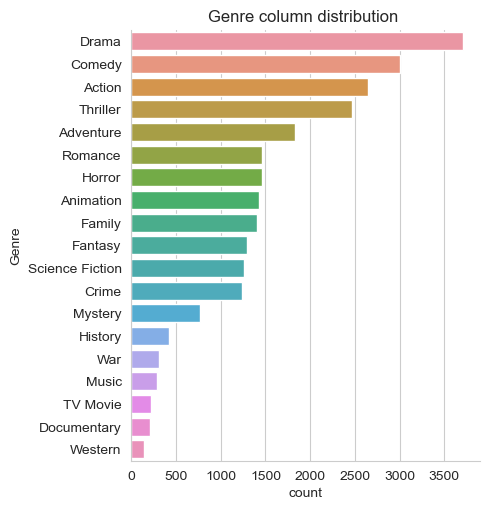

In [32]:
sns.catplot( y = 'Genre' , data = df , kind = 'count',
           order = df['Genre'].value_counts().index)
plt.title('Genre column distribution ')
plt.show()

# Which has highest votes in vote avg column ?

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [34]:
df['Vote_Average'].describe()

count       25551
unique          4
top       average
freq         6612
Name: Vote_Average, dtype: object

In [35]:
df['Vote_Average'].value_counts(ascending = False)

Vote_Average
average        6612
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


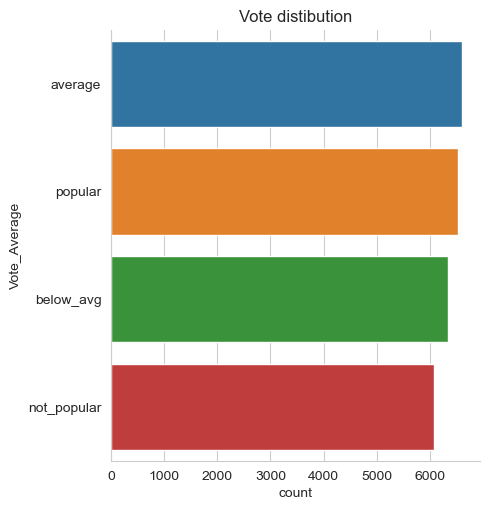

In [36]:
sns.catplot(y = 'Vote_Average', data = df , kind = 'count',
           order = df['Vote_Average'].value_counts().index)
plt.title('Vote distibution')
plt.show()

# which movie got the highest popularity ? what is its genre?

In [37]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [38]:
highest_popularity = df.loc[df['Popularity'].idxmax()]

print(highest_popularity[['Title', 'Popularity','Genre']])

Title         Spider-Man: No Way Home
Popularity                   5083.954
Genre                          Action
Name: 0, dtype: object


In [39]:
df[df['Popularity']==df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# what movie got the lowest popularity ? what's its genre?

In [40]:
df[df['Popularity']==df['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


In [41]:
lowest_popularity = df.loc[df['Popularity'].idxmin()]
print(lowest_popularity[['Title' , 'Popularity','Genre']])

Title         The United States vs. Billie Holiday
Popularity                                  13.354
Genre                                        Music
Name: 25545, dtype: object


# Which year has the most filmmed movie?

In [42]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


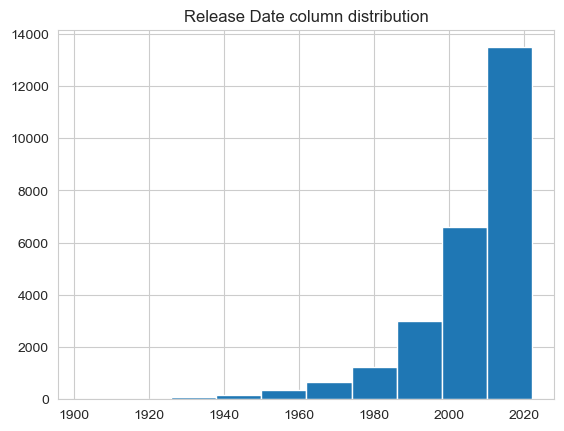

In [43]:
df['Release_Date'].hist()
plt.title('Release Date column distribution')
plt.show()

In [44]:
year_film=df.groupby('Release_Date')['Title'].count()
year_film.sort_values(ascending=False)

Release_Date
2021    1636
2018    1384
2017    1365
2019    1271
2016    1209
        ... 
1920       4
1902       3
1929       2
1930       2
1925       2
Name: Title, Length: 100, dtype: int64

# Summary

Q1:- What is the most frequent genre of movie released as on Netflix?
Drama is the most frequent genre in our dataset

Q2 :- Which Genre has highest vote?
Ans:- The Average popularity 

Q3:- What movie got the highest popularity? Whats its Genre?
Ans:- Spider-Man: No Way Home	wih popularity 5083.954	

Q4:- What movie got the Lowest popularity? Whats its Genre?
Ans:- The United States vs Billie Holiday and Threads had lowest popularity of 13.354

Q5:-Which year has the most filmed movie?
Answer:-2020 has teh highest filming rate in our dataset